In [2]:
from astropy.table import Table
from astropy.io import fits
from imaka.analysis import plot_stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

root_dir = "//Users/fatimaabdurrahman/Desktop/Research/"
stats_dir_end = "/FLI/reduce/stats/"

#open files
r1d1_o = root_dir+"RUN3/20170109"+stats_dir_end+"stats_open_mdp.fits"
r1d2_o = root_dir+"RUN3/20170110"+stats_dir_end+"stats_open_mdp.fits"
r1d3_o = root_dir+"RUN3/20170111"+stats_dir_end+"stats_open_mdp.fits"
#r1d4_o = root_dir+"RUN3/20170112"+stats_dir_end+"stats_open_mdp.fits"
r1d5_o = root_dir+"RUN3/20170113"+stats_dir_end+"stats_open1_mdp.fits"
r1d6_o = root_dir+"RUN3/20170113"+stats_dir_end+"stats_open2_mdp.fits"

r2d1_o = root_dir+"RUN4/20170214"+stats_dir_end+"stats_open_mdp_altaz.fits"
r2d2_o = root_dir+"RUN4/20170215"+stats_dir_end+"stats_open_mdp_altaz.fits"
r2d3_o = root_dir+"RUN4/20170216"+stats_dir_end+"stats_open_mdp_altaz.fits"
r2d4_o = root_dir+"RUN4/20170217"+stats_dir_end+"stats_open_mdp_altaz.fits"
r2d5_o = root_dir+"RUN4/20170218"+stats_dir_end+"stats_open_mdp_altaz.fits"

r3d1_o = root_dir+"RUN5/20170517"+stats_dir_end+"stats_open_mdp_alt_altaz.fits"
r3d2_o = root_dir+"RUN5/20170518"+stats_dir_end+"stats_open_mdp_alt_altaz.fits"
r3d3_o = root_dir+"RUN5/20170519"+stats_dir_end+"stats_open_mdp_alt_altaz.fits"
r3d4_o = root_dir+"RUN5/20170520"+stats_dir_end+"stats_open_mdp_alt_altaz.fits"
r3d5_o = root_dir+"RUN5/20170521"+stats_dir_end+"stats_open_mdp_alt_altaz.fits"
#r3d6_o = root_dir+"RUN5/20170522"+stats_dir_end+"stats_open_mdp.fits"

open_files = [r1d1_o, r1d2_o, r1d3_o, r1d5_o, r1d5_o, \
             r2d1_o, r2d2_o, r2d3_o, r2d4_o, r2d5_o, \
             r3d1_o, r3d2_o, r3d3_o, r3d4_o, r3d5_o]#, r3d6_o]

#closed files
r1d1_c = root_dir+"RUN3/20170109"+stats_dir_end+"stats_closed_mdp.fits"
r1d2_c = root_dir+"RUN3/20170110"+stats_dir_end+"stats_closed_mdp.fits"
r1d3_c = root_dir+"RUN3/20170111"+stats_dir_end+"stats_closed_mdp.fits"
#r1d4_c = root_dir+"RUN3/20170112"+stats_dir_end+"stats_closed_mdp.fits"
r1d5_c = root_dir+"RUN3/20170113"+stats_dir_end+"stats_closed1_mdp.fits"
r1d6_c = root_dir+"RUN3/20170113"+stats_dir_end+"stats_closed2_mdp.fits"

r2d1_c = root_dir+"RUN4/20170214"+stats_dir_end+"stats_closed_mdp.fits"
r2d2_c = root_dir+"RUN4/20170215"+stats_dir_end+"stats_closed_mdp.fits"
r2d3_c = root_dir+"RUN4/20170216"+stats_dir_end+"stats_closeda_mdp.fits"
r2d4_c = root_dir+"RUN4/20170217"+stats_dir_end+"stats_closeda_mdp.fits"
r2d5_c = root_dir+"RUN4/20170218"+stats_dir_end+"stats_closeda_mdp.fits"

r3d1_c = root_dir+"RUN5/20170517"+stats_dir_end+"stats_closed_mdp.fits"
r3d2_c = root_dir+"RUN5/20170518"+stats_dir_end+"stats_closed_mdp.fits"
r3d3_c = root_dir+"RUN5/20170519"+stats_dir_end+"stats_closed_mdp.fits"
r3d4_c = root_dir+"RUN5/20170520"+stats_dir_end+"stats_closedA_mdp.fits"
r3d5_c = root_dir+"RUN5/20170521"+stats_dir_end+"stats_closed_mdp.fits"
#r3d6_c = root_dir+"RUN5/20170522"+stats_dir_end+"stats_closed_mdp.fits"

closed_files = [r1d1_c, r1d2_c, r1d3_c,  r1d5_c, r1d5_c, \
             r2d1_c, r2d2_c, r2d3_c, r2d4_c, r2d5_c, \
             r3d1_c, r3d2_c, r3d3_c, r3d4_c, r3d5_c]#, r3d6_c]

In [3]:
#not all telemetry data is here: 

r1d4_tel = root_dir + "RUN3/20170112" + stats_dir_end + "profile-data_20170112.fits"

r2d1_tel = root_dir + "RUN4/20170214" + stats_dir_end + "profile-data_20170214-noTT.fits"
r2d2_tel = root_dir + "RUN4/20170215" + stats_dir_end + "profile-data_20170215-noTT.fits"
r2d3_tel = root_dir + "RUN4/20170216" + stats_dir_end + "profile-data_20170216-noTT.fits"
r2d4_tel = root_dir + "RUN4/20170217" + stats_dir_end + "profile-data_20170217-noTT.fits"
#r2d5_tel = root_dir + "RUN4/20170218" + stats_dir_end + "profile-data_20170218-noTT.fits"

r3d1_tel = root_dir + "RUN5/20170517" + stats_dir_end + "profile-data_20170517-noTT.fits"
r3d2_tel = root_dir + "RUN5/20170518" + stats_dir_end + "profile-data_20170518-noTT.fits"
r3d3_tel = root_dir + "RUN5/20170519" + stats_dir_end + "profile-data_20170519-noTT.fits"
r3d4_tel = root_dir + "RUN5/20170520" + stats_dir_end + "profile-data_20170520-noTT.fits"
r3d5_tel = root_dir + "RUN5/20170521" + stats_dir_end + "profile-data_20170521-noTT.fits"
#r3d6_tel = root_dir + "RUN5/20170522" + stats_dir_end + "profile-data_20170522-noTT.fits"

tel_files = [r1d4_tel, \
            r2d1_tel, r2d2_tel, r2d3_tel, r2d4_tel, \
            r3d1_tel, r3d2_tel, r3d3_tel, r3d4_tel, r3d5_tel]#, r3d6_tel]

int_see = []
free_atm = []

for file in tel_files:
    data = fits.getdata(file)
    int_see.append(data[:,1]) #compares to dimm
    free_atm.append(data[:,-1]) #compares to mass

all_int_see = np.concatenate(int_see)
all_free_atm = np.concatenate(free_atm)

In [8]:
len(nm656_c) + len(nm806_c) + len(nm1000_c) == len(all_closed_fwhm)

NameError: name 'nm656_c' is not defined

In [5]:
open_nea_tables = []
open_EE80_tables = []
open_emp_fwhm = []
open_filter = []
open_bin = []
mass = []
dimm = []

scale = 0.04

for file in open_files:
    table = Table.read(file)
    open_nea_tables.append(np.array(table['NEA']))
    open_EE80_tables.append(np.array(table['EE50']))
    open_emp_fwhm.append(np.array(table['emp_fwhm']))
    mass.append(np.array(table['MASS']))
    dimm.append(np.array(table['DIMM']))
    if 2.0 in table[0] or 3.0 in table[0]:
        open_filter.append(np.array(table['FILTER']))
        open_bin.append(np.array(table['BINFAC']))
    else:
        bin_ar = [3.0 for x in range(len(table))]
        if 'r1d5' in file:
            filt_ar = ["I" for x in range(len(table))]
        else:
            filt_ar = ["R" for x in range(len(table))]
        open_filter.append(filt_ar)
        open_bin.append(bin_ar)
    
    
closed_nea_tables = []
closed_EE80_tables = []
closed_emp_fwhm = []
closed_filter = []
closed_bin = []

for file in closed_files:
    table = Table.read(file)
    closed_nea_tables.append(np.array(table['NEA']))
    closed_EE80_tables.append(np.array(table['EE50']))
    closed_emp_fwhm.append(np.array(table['emp_fwhm']))
    mass.append(np.array(table['MASS']))
    dimm.append(np.array(table['DIMM']))
    if 2.0 in table[0] or 3.0 in table[0]:
        closed_filter.append(np.array(table['FILTER']))
        closed_bin.append(np.array(table['BINFAC']))
    else:
        bin_ar = [3.0 for x in range(len(table))]
        if 'r1d5' in file:
            filt_ar = ["I" for x in range(len(table))]
        else:
            filt_ar = ["R" for x in range(len(table))]
        closed_filter.append(filt_ar)
        closed_bin.append(bin_ar)
    
all_open_nea = np.concatenate(open_nea_tables)
all_closed_nea = np.concatenate(closed_nea_tables)
all_open_EE80 = np.concatenate(open_EE80_tables)
all_closed_EE80 = np.concatenate(closed_EE80_tables)
all_open_emp_fwhm = np.concatenate(open_emp_fwhm)
all_closed_emp_fwhm = np.concatenate(closed_emp_fwhm)
all_mass = np.concatenate(mass)
all_dimm = np.concatenate(dimm)
all_closed_bin = np.concatenate(closed_bin)
all_closed_filter = plot_stats.filter2wv(np.concatenate(closed_filter))
all_open_bin = np.concatenate(open_bin)
all_open_filter = plot_stats.filter2wv(np.concatenate(open_filter))
all_open_fwhm = all_open_emp_fwhm * ((all_open_filter/500)**0.2) * all_open_bin * 0.04
all_closed_fwhm = all_closed_emp_fwhm * ((all_closed_filter/500)**0.2) * all_closed_bin * 0.04

# Plot
# max_val = np.amax(all_open_nea)
# bins_set = np.arange(0, max_val, max_val/30)
# bins_set_cdf = np.arange(0, max_val, max_val/60)

# max_val_EE = np.amax(all_open_EE80)
# bins_set_EE = np.arange(0, max_val_EE, max_val_EE/30)
# bins_set_EE_cdf = np.arange(0, max_val_EE, max_val_EE/120)

# # NEA PDF
# plt.figure(1, figsize = (8,6))
# plt.hist(all_open_nea,  alpha=0.5, bins=bins_set, color='blue', label='Open Loop', normed=1);
# plt.hist(all_closed_nea,  alpha=0.5, bins=bins_set, color='red', label='Closed Loop', normed=1);
# plt.ylabel('Normalized Frequency', fontsize=13)
# plt.xlabel('Noise Equivalent Area (arcsec^2)', fontsize=13)
# plt.axis([0, 8, 0, 1])
# plt.legend()
# plt.axvline(np.median(all_open_nea), color='b', linestyle='dashed', linewidth=2, label='Open Median')
# plt.axvline(np.median(all_closed_nea), color='r', linestyle='dashed', linewidth=2, label='Closed Median')
# #plt.savefig('NEA PDF')

# # NEA CDF
# plt.figure(2, figsize = (8,6))
# plt.hist(all_open_nea,  alpha=0.5, bins=bins_set_cdf, color='blue', label='Open Loop', cumulative=True, normed=1, histtype='step');
# plt.hist(all_closed_nea,  alpha=0.5, bins=bins_set_cdf, color='red', label='Closed Loop', cumulative=True, normed=1, histtype='step');
# plt.xlabel('Noise Equivalent Area (arcsec^2)', fontsize=13)
# plt.ylabel('Normalized Frequency', fontsize=13)
# plt.axis([0, 8, 0, 1])
# plt.legend(loc=4)
# #plt.savefig('NEA CDF')

# #EE80 PDF
# plt.figure(3, figsize = (8,6))
# plt.hist(all_open_EE80, normed=1, alpha=0.5, bins=bins_set_EE, color='blue', label='Open Loop');
# plt.hist(all_closed_EE80, normed=1, alpha=0.5, bins=bins_set_EE, color='red', label='Closed Loop');
# plt.xlabel('50% Enclosed Energy Radius (arcsec)', fontsize=13)
# plt.ylabel('Normalized Frequency', fontsize=13)
# plt.axis([0, 1.5, 0, 8])
# plt.legend()
# plt.axvline(np.median(all_open_EE80), color='b', linestyle='dashed', linewidth=2, label='Open Median')
# plt.axvline(np.median(all_closed_EE80), color='r', linestyle='dashed', linewidth=2, label='Closed Median')
# #plt.savefig('EE50 PDF')

# # EE80 CDF
# plt.figure(4, figsize = (8,6))
# plt.hist(all_open_EE80,  alpha=0.5, bins=bins_set_EE_cdf, color='blue', label='Open Loop', cumulative=True, normed=1, histtype='step');
# plt.hist(all_closed_EE80,  alpha=0.5, bins=bins_set_EE_cdf, color='red', label='Closed Loop', cumulative=True, normed=1, histtype='step');
# plt.xlabel('50% Enclosed Energy Radius (arcsec)', fontsize=13)
# plt.ylabel('Normalized Frequency', fontsize=13)
# plt.axis([0, 1.5, 0, 1]);
# plt.legend(loc=4)
# #plt.savefig('EE50 CDF')




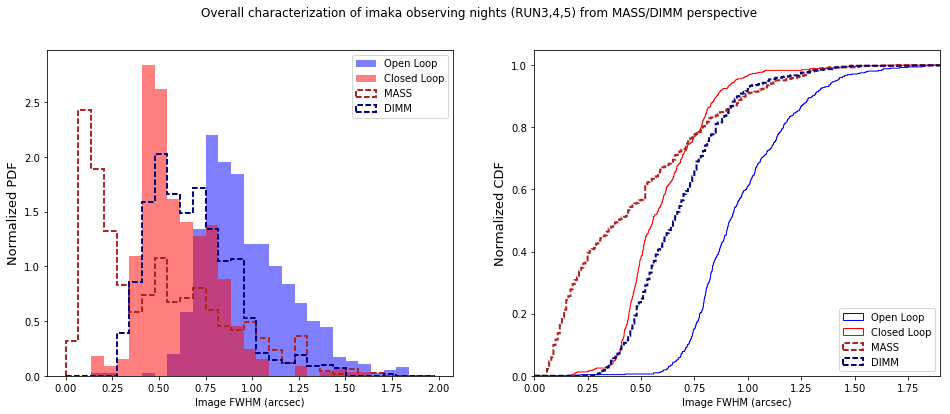

In [9]:
# FWHM vs mass/dimm
max_val_fwhm = np.amax(all_open_fwhm)
bins_set_fwhm = np.arange(0, max_val_fwhm, max_val_fwhm/30)
bins_set_fwhm_cdf = np.arange(0, max_val_fwhm, 0.001)#max_val_fwhm/260)

plt.figure(1, figsize = (16,6))
plt.subplot(1,2,1)
plt.hist(all_open_fwhm, bins=bins_set_fwhm, color='blue', label='Open Loop', normed=1, alpha=0.5);
plt.hist(all_closed_fwhm, bins=bins_set_fwhm, color='red', label='Closed Loop', normed=1, alpha=0.5);
plt.hist(all_mass,  bins=bins_set_fwhm, color='Firebrick', label='MASS',linestyle=('dashed'), linewidth=2, normed=1, histtype='step')
plt.hist(all_dimm,  bins=bins_set_fwhm, color='Navy', label='DIMM', linestyle=('dashed'), linewidth=2, normed=1, histtype='step')
plt.ylabel('Normalized PDF', fontsize=13)
#plt.axis([0, 1.9, 0, 1.05])
#plt.axvline(np.median(all_open_fwhm), color='b', linestyle='dashed', linewidth=2, label='Open Median')
#plt.axvline(np.median(all_closed_fwhm), color='r', linestyle='dashed', linewidth=2, label='Closed Median')
plt.legend()
plt.xlabel('Image FWHM (arcsec)')

plt.subplot(1,2,2)
plt.hist(all_open_fwhm, bins=bins_set_fwhm_cdf, color='blue', label='Open Loop', normed=1, cumulative=True, histtype='step');
plt.hist(all_closed_fwhm, bins=bins_set_fwhm_cdf, color='red', label='Closed Loop', normed=1, cumulative=True, histtype='step');
plt.hist(all_mass,  bins=bins_set_fwhm_cdf, color='Firebrick', label='MASS',linestyle=('dashed'), linewidth=2, normed=1, histtype='step', cumulative=True)
plt.hist(all_dimm,  bins=bins_set_fwhm_cdf, color='Navy', label='DIMM', linestyle=('dashed'), linewidth=2, normed=1, histtype='step', cumulative=True)
plt.ylabel('Normalized CDF', fontsize=13)
plt.axis([0, 1.9, 0, 1.05])
plt.legend(loc=4)
plt.xlabel('Image FWHM (arcsec)')

plt.suptitle("Overall characterization of imaka observing nights (RUN3,4,5) from MASS/DIMM perspective")
plt.savefig('Open v Closed (b)')


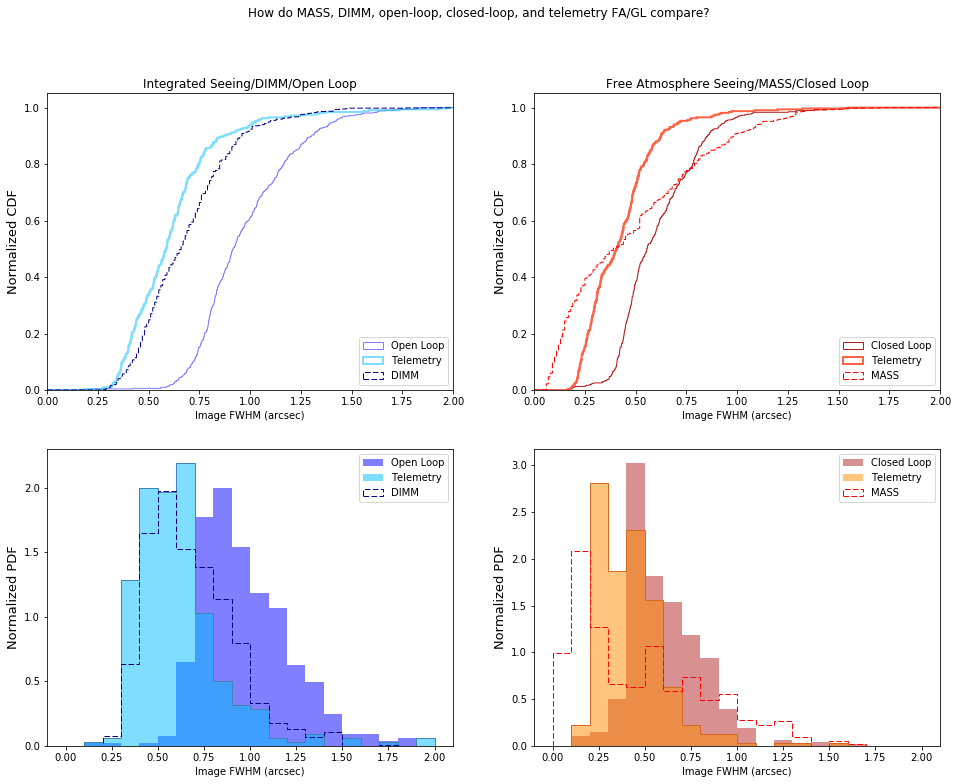

In [10]:
# FWHM vs mass/dimm
max_val_fwhm = np.amax(all_open_fwhm)
bins_set_fwhm = np.arange(0, max_val_fwhm, .1)#max_val_fwhm/30)
bins_set_fwhm_cdf = np.arange(0, max_val_fwhm, .001)#max_val_fwhm/260)

plt.figure(1, figsize = (16,12))
plt.suptitle("How do MASS, DIMM, open-loop, closed-loop, and telemetry FA/GL compare?")

plt.subplot(2,2,1)
plt.title('Integrated Seeing/DIMM/Open Loop')
plt.hist(all_open_fwhm, bins=bins_set_fwhm_cdf, color='blue', label='Open Loop', normed=1, alpha=0.5, cumulative=True, histtype='step');
plt.hist(all_int_see, bins=bins_set_fwhm_cdf, color='#00bfff', linewidth=2, label='Telemetry', normed=1, alpha=0.5, cumulative=True, histtype='step')
plt.hist(all_dimm,  bins=bins_set_fwhm_cdf, color='Navy', label='DIMM', linestyle=('dashed'), normed=1,cumulative=True, histtype='step')
plt.ylabel('Normalized CDF', fontsize=13); plt.axis([0, 2, 0, 1.05]); plt.legend(loc=4)
plt.xlabel('Image FWHM (arcsec)')

plt.subplot(2,2,2)
plt.title('Free Atmosphere Seeing/MASS/Closed Loop')
plt.hist(all_closed_fwhm, bins=bins_set_fwhm_cdf, color='Firebrick', label='Closed Loop', normed=1,cumulative=True, histtype='step');
plt.hist(all_free_atm, bins=bins_set_fwhm_cdf, color='Tomato', linewidth=2, label='Telemetry', normed=1,  cumulative=True, histtype='step')
plt.hist(all_mass,  bins=bins_set_fwhm_cdf, color='Red', label='MASS', linestyle=('dashed'), normed=1,cumulative=True, histtype='step')
plt.ylabel('Normalized CDF', fontsize=13); plt.axis([0, 2, 0, 1.05]); plt.legend(loc=4)
plt.xlabel('Image FWHM (arcsec)')

plt.subplot(2,2,3)
plt.hist(all_open_fwhm, bins=bins_set_fwhm, color='blue', label='Open Loop', normed=1, alpha=0.5);
plt.hist(all_int_see, bins=bins_set_fwhm, color='#00bfff', label='Telemetry', normed=1, alpha=0.5)
plt.hist(all_int_see, bins=bins_set_fwhm, color='#4682b4', normed=1, histtype='step')
plt.hist(all_dimm,  bins=bins_set_fwhm, color='Navy', label='DIMM', linestyle=('dashed'), normed=1, histtype='step')
plt.ylabel('Normalized PDF', fontsize=13)
plt.legend()
plt.xlabel('Image FWHM (arcsec)')

plt.subplot(2,2,4)
plt.hist(all_closed_fwhm, bins=bins_set_fwhm, color='Firebrick', label='Closed Loop', normed=1, alpha=0.5);
plt.hist(all_free_atm, bins=bins_set_fwhm, color='#ff8c00', label='Telemetry', normed=1, alpha=0.5)
plt.hist(all_free_atm, bins=bins_set_fwhm, color='Chocolate', normed=1, histtype='step')
plt.hist(all_mass,  bins=bins_set_fwhm, color='Red', label='MASS', linestyle=('dashed'), normed=1, histtype='step')
plt.ylabel('Normalized PDF', fontsize=13)
plt.legend()
plt.xlabel('Image FWHM (arcsec)')

plt.savefig('comparison_c')



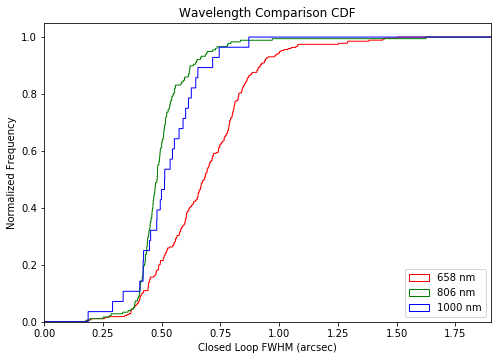

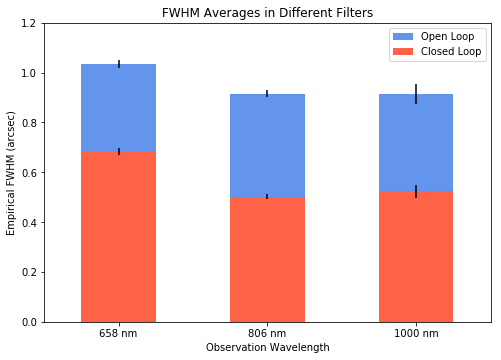

In [11]:
nm658_c = []; nm658_o = []
nm806_c = []; nm806_o = []
nm1000_c = []; nm1000_o = []

for i in range(len(all_open_filter)):
    if all_open_filter[i] == 658:
        nm658_o.append(all_open_fwhm[i])
    if all_open_filter[i] == 806:
        nm806_o.append(all_open_fwhm[i])
    if all_open_filter[i] == 1000:
        nm1000_o.append(all_open_fwhm[i])
        
        
for i in range(len(all_closed_filter)):
    if all_closed_filter[i] == 658:
        nm658_c.append(all_closed_fwhm[i])
    if all_closed_filter[i] == 806:
        nm806_c.append(all_closed_fwhm[i])
    if all_closed_filter[i] == 1000:
        nm1000_c.append(all_closed_fwhm[i])
        
nm658_c_ave = np.mean(nm658_c)
nm806_c_ave = np.mean(nm806_c)
nm1000_c_ave = np.mean(nm1000_c)
nm658_c_std = np.std(nm658_c)/np.sqrt(len(nm658_c))
nm806_c_std = np.std(nm806_c)/np.sqrt(len(nm806_c))
nm1000_c_std = np.std(nm1000_c)/np.sqrt(len(nm1000_c))

nm658_o_ave = np.mean(nm658_o)
nm806_o_ave = np.mean(nm806_o)
nm1000_o_ave = np.mean(nm1000_o)
nm658_o_std = np.std(nm658_o)/np.sqrt(len(nm658_o))
nm806_o_std = np.std(nm806_o)/np.sqrt(len(nm806_o))
nm1000_o_std = np.std(nm1000_o)/np.sqrt(len(nm1000_o))

      
max_val_fwhm = np.amax(all_open_fwhm)
bins_set_fwhm = np.arange(0, max_val_fwhm, max_val_fwhm/30)
bins_set_fwhm_cdf = np.arange(0, max_val_fwhm, 0.001)
        
plt.figure(1, figsize=(8,5.5))
plt.hist(nm658_c, bins=bins_set_fwhm_cdf, color='red', normed=True, cumulative=True, histtype='step', label='658 nm');
plt.hist(nm806_c, bins=bins_set_fwhm_cdf, color='green', normed=True, cumulative=True, histtype='step', label='806 nm');
plt.hist(nm1000_c, bins=bins_set_fwhm_cdf, color='blue', normed=True, cumulative=True, histtype='step', label='1000 nm');
plt.legend(loc=4)
plt.axis([0,1.9,0,1.05])
plt.xlabel('Closed Loop FWHM (arcsec)')
plt.ylabel('Normalized Frequency')
plt.title('Wavelength Comparison CDF')
plt.savefig('Wavelength CDF')

plt.figure(2, figsize=(8,5.5))
N = 3
closed_means = (nm658_c_ave, nm806_c_ave, nm1000_c_ave)
closed_std = (nm658_c_std, nm806_c_std, nm1000_c_std)
open_means = (nm658_o_ave, nm806_o_ave, nm1000_o_ave)
open_std = (nm658_o_std, nm806_o_std, nm1000_o_std)

ind = np.arange(N)  # the x locations for the groups
width = 0.5       # the width of the bars
plt.bar(ind, open_means, width, color='#6495ed', yerr=open_std, label="Open Loop")
plt.bar(ind, closed_means, width, color='Tomato', yerr=closed_std, tick_label=['658 nm', '806 nm', '1000 nm'], label="Closed Loop")
plt.xlabel('Observation Wavelength')
plt.ylabel('Empirical FWHM (arcsec)')
plt.legend()
plt.title('FWHM Averages in Different Filters')
plt.axis([-0.5, 2.5, 0, 1.2])
plt.savefig('Wavelength Bars')


In [13]:
len(nm658_c) + len(nm806_c) + len(nm1000_c) == len(all_closed_fwhm)

True